In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read_vcf関数の定義
import pandas as pd
import io
import os


def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    return pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})

In [3]:
#vcfファイルをDataFrameとして読み込む
df1 = read_vcf('../sample_data/dat/NA18943.vcf')
df2 = read_vcf('../sample_data/dat/NA19011.vcf')

In [4]:
df1.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,PG1558_01AE02_b
0,chr1,14653,.,C,T,17.89,LowQD;VeryLowQual,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.231;DP=23;D...,GT:AD:DP:GQ:PL,"0/1:20,3:22:19:46,0,19"
1,chr1,139213,.,A,G,270.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.692;DP=174;...,GT:AD:DP:GQ:PL,"0/1:117,57:166:99:299,0,337"
2,chr1,139233,.,C,A,333.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.422;DP=181;...,GT:AD:DP:GQ:PL,"0/1:121,60:172:99:362,0,802"
3,chr1,325075,.,G,C,41.74,LowQual,AC=2;AF=1.00;AN=2;BaseQRankSum=0.804;DP=19;Del...,GT:AD:DP:GQ:PL,"1/1:17,2:19:6:69,6,0"
4,chr1,663097,.,G,C,230.80,VQSRTrancheBOTH99.00to99.90,AC=2;AF=1.00;AN=2;DP=18;Dels=0.00;FS=0.000;Hap...,GT:AD:DP:GQ:PL,"1/1:0,18:18:21:259,21,0"


In [5]:
df2.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,PG1711_01AH11_b
0,chr1,14677,.,G,A,103.77,VQSRTrancheBOTH99.00to99.90,AC=1;AF=0.500;AN=2;BaseQRankSum=-2.166;DP=25;D...,GT:AD:DP:GQ:PL,"0/1:19,6:24:99:132,0,204"
1,chr1,14907,.,A,G,800.77,VQSRTrancheBOTH99.00to99.90,AC=1;AF=0.500;AN=2;BaseQRankSum=2.329;DP=218;D...,GT:AD:DP:GQ:PL,"0/1:165,53:208:99:829,0,3403"
2,chr1,14930,.,A,G,1090.77,VQSRTrancheBOTH99.90to100.00,AC=1;AF=0.500;AN=2;BaseQRankSum=1.149;DP=201;D...,GT:AD:DP:GQ:PL,"0/1:140,61:191:99:1119,0,3287"
3,chr1,17365,.,C,G,105.77,HARD_TO_VALIDATE;LowQD,AC=1;AF=0.500;AN=2;BaseQRankSum=0.811;DP=76;De...,GT:AD:DP:GQ:PL,"0/1:63,13:73:99:134,0,166"
4,chr1,139213,.,A,G,245.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.471;DP=154;...,GT:AD:DP:GQ:PL,"0/1:102,52:147:99:274,0,263"


**(1)変異数を集計**

In [6]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99041 entries, 0 to 99040
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CHROM            99041 non-null  object
 1   POS              99041 non-null  int32 
 2   ID               99041 non-null  object
 3   REF              99041 non-null  object
 4   ALT              99041 non-null  object
 5   QUAL             99041 non-null  object
 6   FILTER           99041 non-null  object
 7   INFO             99041 non-null  object
 8   FORMAT           99041 non-null  object
 9   PG1558_01AE02_b  99041 non-null  object
dtypes: int32(1), object(9)
memory usage: 7.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99138 entries, 0 to 99137
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CHROM            99138 non-null  object
 1   POS              99138 non-null  int32 
 2   ID

↑VCFfileの行数が変異数(sample1:99041,sample2:99138)

In [7]:
print('サンプル1の変異数:',df1.shape[0])
print('サンプル2の変異数:',df2.shape[0])

サンプル1の変異数: 99041
サンプル2の変異数: 99138


**(2)変異を染色体ごとに集計**

In [8]:
s1 = df1['CHROM'].value_counts()
s2 = df2['CHROM'].value_counts()

s1.rename("sample1",inplace=True)
s2.rename("sample2",inplace=True)

df = pd.DataFrame([s1,s2]).T
df.sort_index()

,sample1,sample2
chr1,9823,9964
chr10,4288,4450
chr11,5987,6050
chr12,5172,5334
chr13,1911,1898
chr14,3371,3500
chr15,3555,3353
chr16,4528,4463
chr17,5315,5492
chr18,1679,1783


↑染色体ごとの行数が各染色体の変異数

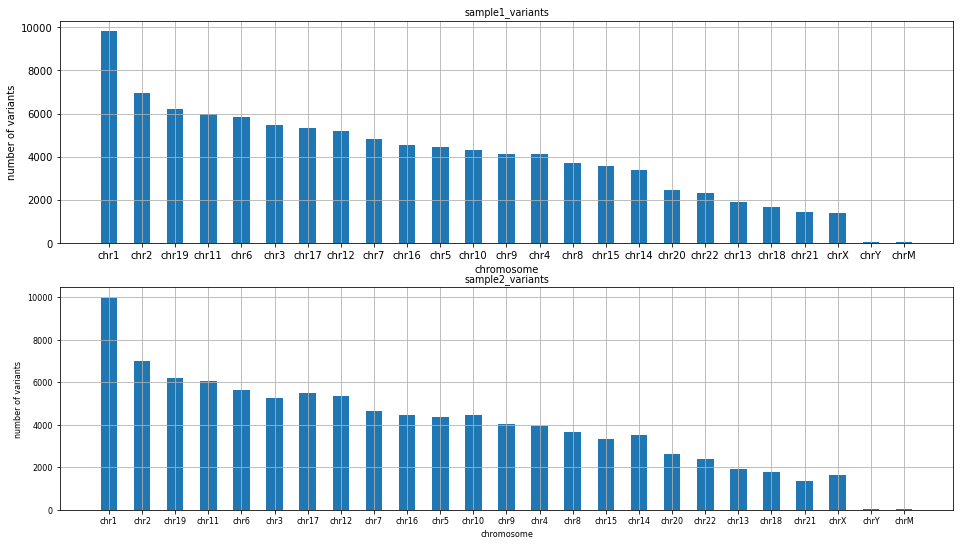

In [9]:
#作図
plt.figure(figsize=(16,9))

label = df.index


#2行1列のグラフの１つ目
plt.subplot(2,1,1)

t = len(df['sample1'])
x = np.arange(t)

plt.bar(x,df['sample1'], tick_label = label, width=0.5)
plt.rcParams["font.size"] = 8
plt.title("sample1_variants")
plt.ylabel("number of variants")
plt.xlabel("chromosome")

plt.grid(True)

#2行1列のグラフの２つ目
plt.subplot(2,1,2)

t = len(df['sample1'])
x = np.arange(t)

plt.bar(x,df['sample2'], tick_label = label, width=0.5)
plt.rcParams["font.size"] = 8
plt.title("sample2_variants")
plt.ylabel("number of variants")
plt.xlabel("chromosome")

plt.grid(True)

#plt.savefig("no_variants.png", bbox_inches='tight')

**(3)2つのサンプル間で共通および異なる変異を集計**

In [10]:
#dataframeをPositionをkeyにマージ
df_merge = pd.merge(df1,df2,on=['POS'])
df_merge.head()

,CHROM_x,POS,ID_x,REF_x,ALT_x,QUAL_x,FILTER_x,INFO_x,FORMAT_x,PG1558_01AE02_b,CHROM_y,ID_y,REF_y,ALT_y,QUAL_y,FILTER_y,INFO_y,FORMAT_y,PG1711_01AH11_b
0,chr1,139213,.,A,G,270.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-1.692;DP=174;...,GT:AD:DP:GQ:PL,"0/1:117,57:166:99:299,0,337",chr1,.,A,G,245.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-3.471;DP=154;...,GT:AD:DP:GQ:PL,"0/1:102,52:147:99:274,0,263"
1,chr1,139233,.,C,A,333.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-8.422;DP=181;...,GT:AD:DP:GQ:PL,"0/1:121,60:172:99:362,0,802",chr1,.,C,A,349.77,HARD_TO_VALIDATE,AC=1;AF=0.500;AN=2;BaseQRankSum=-7.486;DP=163;...,GT:AD:DP:GQ:PL,"0/1:104,59:155:99:378,0,613"
2,chr1,808922,.,G,A,3917.77,PASS,AC=2;AF=1.00;AN=2;DP=121;Dels=0.00;FS=0.000;Ha...,GT:AD:DP:GQ:PL,"1/1:0,121:121:99:3946,319,0",chr1,.,G,A,3262.77,VQSRTrancheBOTH99.00to99.90,AC=2;AF=1.00;AN=2;DP=99;Dels=0.00;FS=0.000;Hap...,GT:AD:DP:GQ:PL,"1/1:0,99:99:99:3291,268,0"
3,chr1,861630,.,G,A,211.80,PASS,AC=2;AF=1.00;AN=2;DP=7;Dels=0.00;FS=0.000;Hapl...,GT:AD:DP:GQ:PL,"1/1:0,7:7:21:240,21,0",chr1,.,G,A,56.77,PASS,AC=1;AF=0.500;AN=2;BaseQRankSum=0.804;DP=5;Del...,GT:AD:DP:GQ:PL,"0/1:2,3:5:64:85,0,64"
4,chr1,866319,.,G,A,711.77,PASS,AC=2;AF=1.00;AN=2;DP=20;Dels=0.00;FS=0.000;Hap...,GT:AD:DP:GQ:PL,"1/1:0,20:20:60:740,60,0",chr1,.,G,A,1055.77,PASS,AC=2;AF=1.00;AN=2;DP=30;Dels=0.00;FS=0.000;Hap...,GT:AD:DP:GQ:PL,"1/1:0,30:30:90:1084,90,0"


In [11]:
#Positionが同じでもvariantが違う可能性がある。

#REFが一致しているものだけ抽出
df_merge = df_merge[df_merge['REF_x'] == df_merge['REF_y']]
#変異が同じものをTrueとして表示
df_merge['match'] = (df_merge['ALT_x'] == df_merge['ALT_y'])
match = df_merge['match'].value_counts()
print(match)
print(match[1])

True     63531
False      228
Name: match, dtype: int64
63531


In [12]:
#Specificなvariantsをまとめたdictionaryの作成。それぞれの変異の総数から共通部分を引く。
sp_variants = {'match':match[1],
               'sample1_specific':df1.shape[0] - match[1],
               'sample2_specific':df2.shape[0] - match[1]
              }
sp_variants

{'match': 63531, 'sample1_specific': 35510, 'sample2_specific': 35607}

In [13]:
print('相同な変異の数:',sp_variants['match'])
print('サンプル1特異的な変異の数:',sp_variants['sample1_specific'])
print('サンプル2特異的な変異の数:',sp_variants['sample2_specific'])

相同な変異の数: 63531
サンプル1特異的な変異の数: 35510
サンプル2特異的な変異の数: 35607


**(4) 隣合った変異間の距離の分布を集計**

In [14]:
#変異間の距離を新たなDataframeにする
pos1 = df1[['POS']]
pos1 = pos1.assign(POS2 = df1['POS'].shift(-1))
pos1['diff'] = pos1['POS2'] - pos1['POS']
#最後の一行は欠損値になるので削除
pos1.drop(pos1.tail(1).index,inplace=True)
pos1.head()

,POS,POS2,diff
0,14653,139213.0,124560.0
1,139213,139233.0,20.0
2,139233,325075.0,185842.0
3,325075,663097.0,338022.0
4,663097,672209.0,9112.0


In [15]:
#変異間の距離を新たなDataframeにする
pos2 = df2[['POS']]
pos2 = pos2.assign(POS2 = df2['POS'].shift(-1))
pos2['diff'] = pos2['POS2'] - pos2['POS']
#最後の一行は欠損値になるので削除
pos2.drop(pos2.tail(1).index,inplace=True)
pos2.head()

,POS,POS2,diff
0,14677,14907.0,230.0
1,14907,14930.0,23.0
2,14930,17365.0,2435.0
3,17365,139213.0,121848.0
4,139213,139233.0,20.0


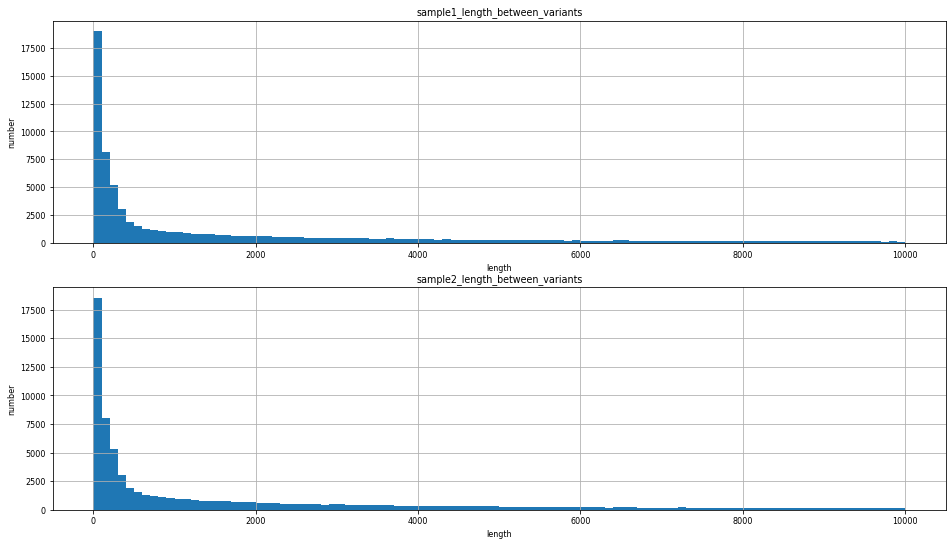

In [16]:
#作図(ヒストグラム)

#グラフの大きさを指定
plt.figure(figsize=(16,9))

#2行1列のグラフの１つ目
plt.subplot(2,1,1)
#対象となるデータ,ビンの数(幅、個数),範囲
plt.hist(pos1['diff'], bins=100, range=(0,10000))

plt.title("sample1_length_between_variants")
plt.xlabel("length")
plt.ylabel("number")

plt.grid(True)


#2行1列のグラフの２つ目
plt.subplot(2,1,2)
#対象となるデータ,ビンの数(幅、個数),範囲
plt.hist(pos2['diff'], bins=100, range=(0,10000))

plt.title("sample2_length_between_variants")
plt.xlabel("length")
plt.ylabel("number")

plt.grid(True)

※変異間の距離の分布は平均値が0に近く,負の値がないため正規分布には近似しないのでは。